# Welcome to My Notebook🩺💊
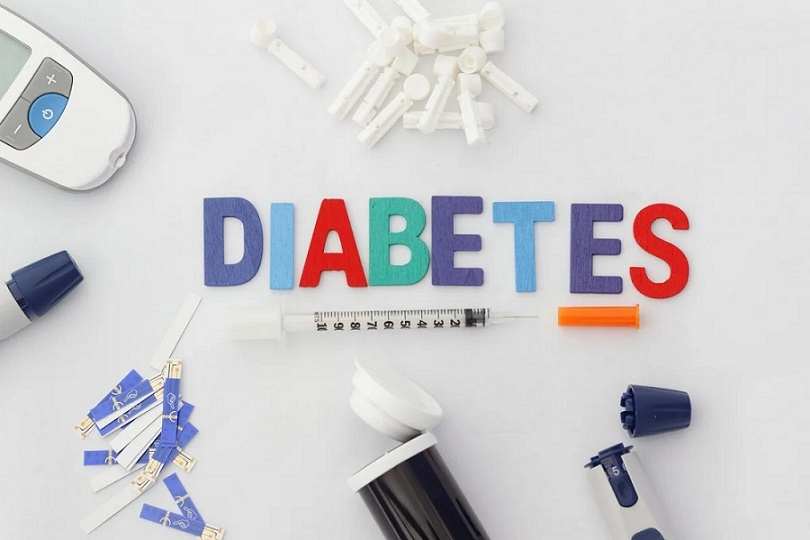

 # Steps for  Building Machine Learning Model 🛠️
 ----------------------
 ### [1-Choosing a Problem and Dataset](#1)
 ### [2-Data Preprocessing](#2)
 ### [3-Exploratory Data Analysis (EDA)](#3)
 ### [4-Splitting the Data](#4)
 ### 5-Model Selection 
 * [FOR REGRESSION TASK](#RegressionTask)
 * [FOR CLASSIFICATION TASK](#ClassificationTask)
 * [FOR UNSEPERVISED TASK](#UnSupervisedTask)
 
 ### [6-Model Training](#6)
 
 ### [7-Model Evaluation](#7)
 
 ### [8-Hyperparameter Tuning](#8)
 
 ### [9-Model Validation ](#9)
 
 ### [10-Model Testing](#10)

<a id='1'></a>

## 1-Define the Problem & Dataset:
----------------------------
**Diabetes is a chronic condition that affects how the body processes blood sugar (glucose). Proper management of diabetes is crucial to prevent serious complications**

**our dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes , for more details:** https://www.kaggle.com/competitions/diabetes-ai-summer-training-iti/data

## Collect Data & Libraries

In [1]:
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, roc_curve
import warnings

In [2]:
data=pd.read_csv('diabetesiti')

In [3]:
data.shape

(768, 9)

In [4]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

<a id='2'></a>

# 2-Data Preprocessing⚙️

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### --> Handle Missing Values

In [8]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

##### We made sure that there is no Null Vlaues ✔️

In [9]:
# Total number of null values in the data
data.isnull().sum().sum() 

0

### --> Remove Duplicates 

In [10]:
data = data.drop_duplicates()

In [11]:
print('Dupllicated',data.duplicated().sum()/len(data))
print('Shape of data after duplicated',data.shape)

Dupllicated 0.0
Shape of data after duplicated (768, 9)


### --> Outlier Detection and Removal

In [12]:
df_t = data.copy()
df_t_name = df_t.columns
df_name=data.columns

In [13]:
def detect_outliers(df,Feature,drop=False):
    valueOfFeature = df[Feature]
    Q1 = np.percentile(valueOfFeature, 25.)
    Q3 = np.percentile(valueOfFeature, 75.)
    step = (Q3-Q1)*1.5
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    if drop:
        good_data = df.drop(df.index[outliers]).reset_index(drop = True)
        return good_data
    else: 
        return df

In [14]:
df_clean = df_t.copy()
for i in range(9):
    df_clean =detect_outliers(df_clean,df_name[i], True)

In [15]:
df_clean.shape

(636, 9)

### --> Normalization/Standardization

In [16]:
features_to_scale=['Pregnancies','BloodPressure','SkinThickness']
scaler = StandardScaler()
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

In [17]:
features_to_scale=['Glucose','BMI']
scaler = RobustScaler()
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

<a id='3'></a>

# 3-Exploratory Data Analysis📊

In [18]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,6.360000e+02,636.000000,6.360000e+02,6.360000e+02,636.000000,636.000000,636.000000,636.000000,636.000000
mean,-3.910219e-17,0.130725,1.927180e-16,1.089275e-16,69.017296,-0.004121,0.426237,32.555031,0.309748
std,1.000787e+00,0.778437,1.000787e+00,1.000787e+00,83.601857,0.733808,0.245088,10.879807,0.462754
min,-1.165393e+00,-1.879195,-3.011620e+00,-1.363054e+00,0.000000,-1.586207,0.078000,21.000000,0.000000
25%,-8.575896e-01,-0.402685,-7.091490e-01,-1.363054e+00,0.000000,-0.540230,0.238750,24.000000,0.000000
50%,-2.419835e-01,0.000000,-6.961997e-04,1.481446e-01,42.500000,0.000000,0.361000,29.000000,0.000000
75%,6.814256e-01,0.597315,7.077566e-01,7.394831e-01,122.000000,0.459770,0.583000,40.000000,1.000000
max,2.836047e+00,2.255034,3.010228e+00,2.579203e+00,330.000000,2.022989,1.162000,65.000000,1.000000


**Visualize the distribution of features**

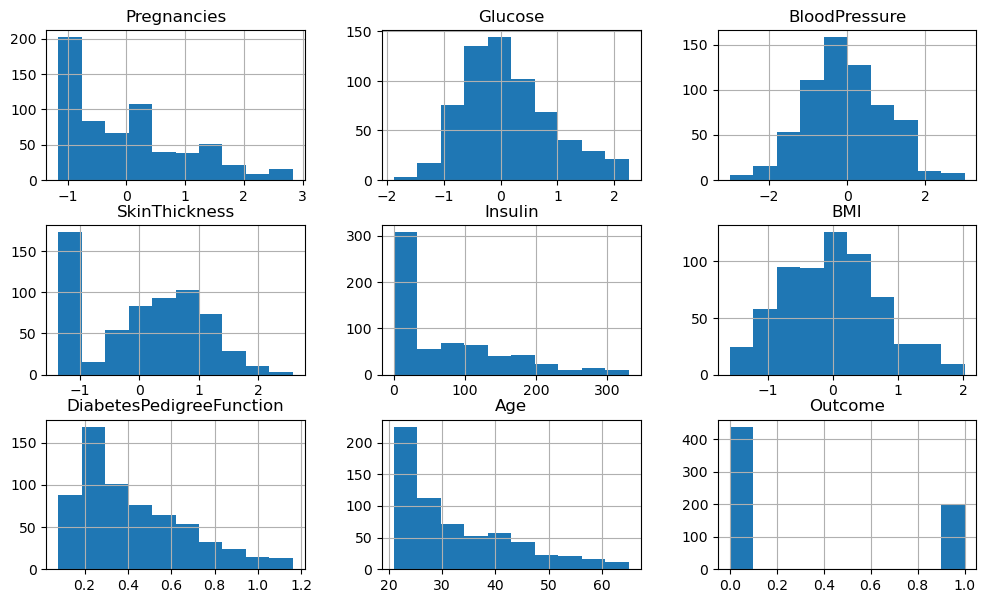

In [19]:
df_clean.hist(figsize=(12,7))
plt.show()

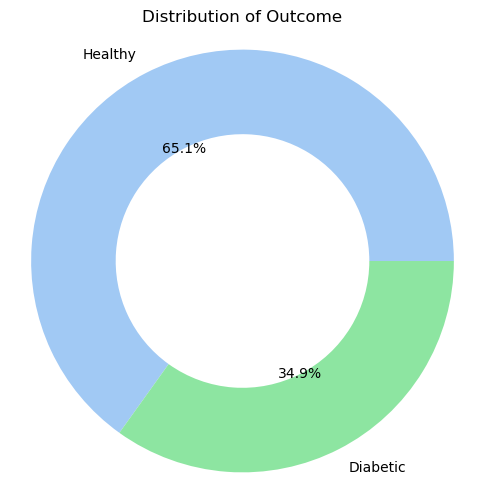

In [20]:
palette = sns.color_palette("pastel6")
labels = ["Healthy", "Diabetic"]
type_counts = data['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.4), colors=palette)
plt.title('Distribution of Outcome')
plt.axis('equal')
plt.show()

**Distribution of healthy & Diabetic people**

Number of diabetic people:  197
Number of healthy people:  439


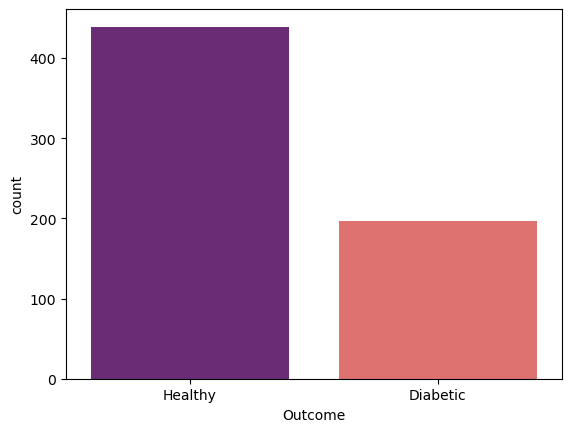

In [21]:
ax = sns.countplot(x=df_clean['Outcome'], data=df_clean,palette="magma")
ax.set_xticklabels(["Healthy","Diabetic"])
healthy, diabetics = df_clean['Outcome'].value_counts().values
print("Number of diabetic people: ", diabetics)
print("Number of healthy people: ", healthy)

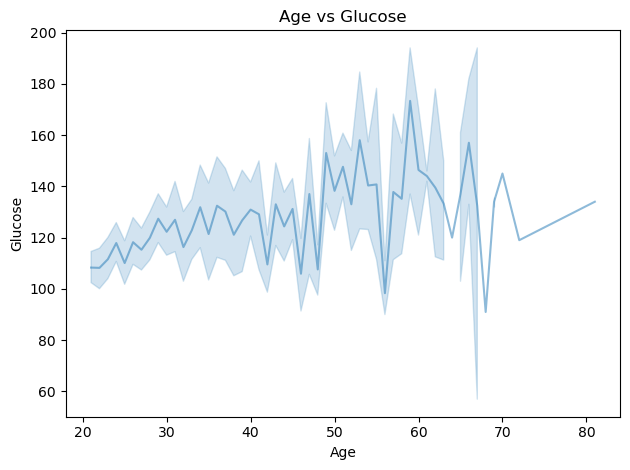

In [22]:
sns.lineplot(x='Age', y='Glucose', data=data, alpha=0.5)
plt.title('Age vs Glucose')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Diabetic Pregnancies & Healthy Pregnancies')

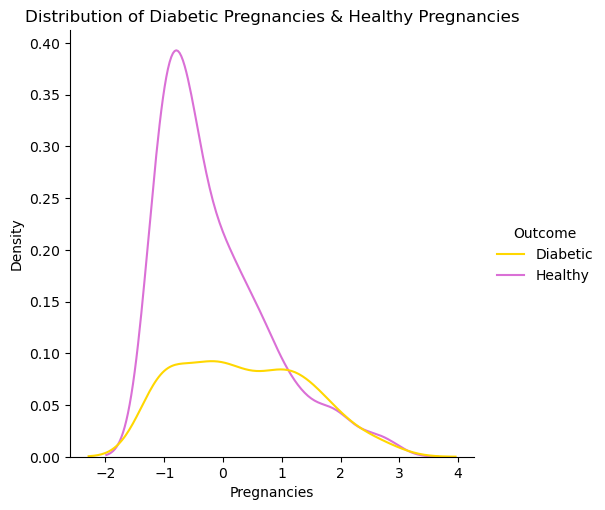

In [23]:
df_clean['Outcome'] = df_clean['Outcome'].map({0: "Healthy", 1: "Diabetic"})
sns.displot(df_clean, x='Pregnancies', hue='Outcome', kind='kde', palette={"Healthy": "orchid", "Diabetic": "gold"})
plt.xlabel('Pregnancies')
plt.ylabel('Density')
plt.title('Distribution of Diabetic Pregnancies & Healthy Pregnancies')

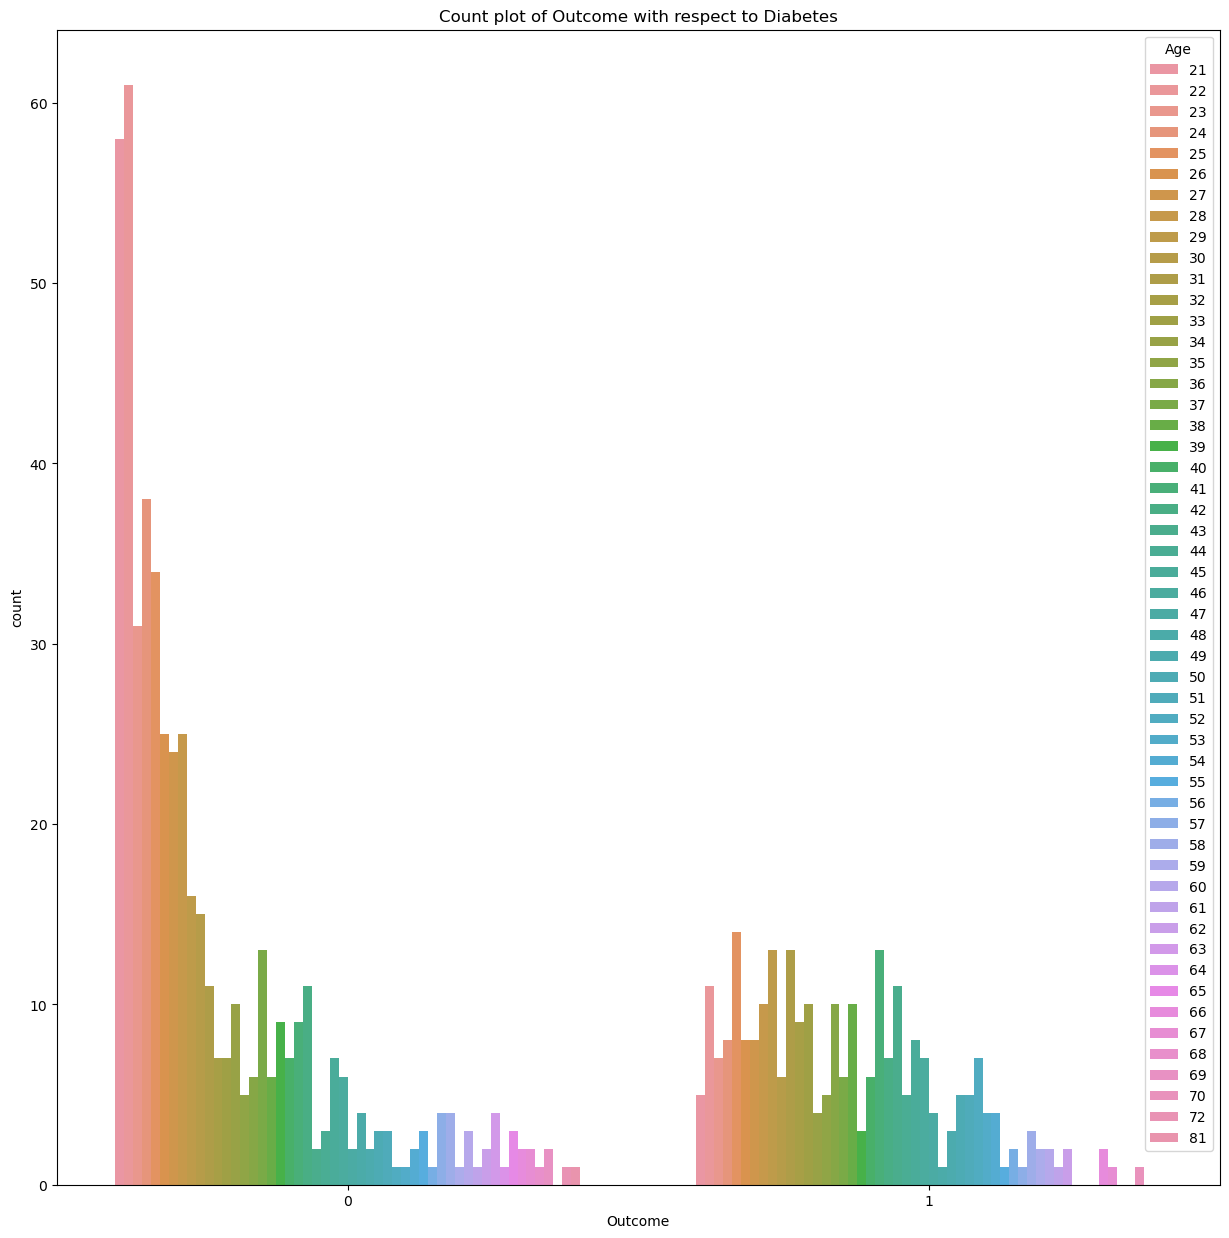

In [24]:
# Countplot for categorical variables
categorical_columns = ['Outcome']
for column in categorical_columns:
    plt.figure(figsize=(15, 15))
    sns.countplot(x=column, hue='Age', data=data)
    plt.title(f'Count plot of {column} with respect to Diabetes')
    plt.show()

Text(0, 0.5, 'Glucose Concentration')

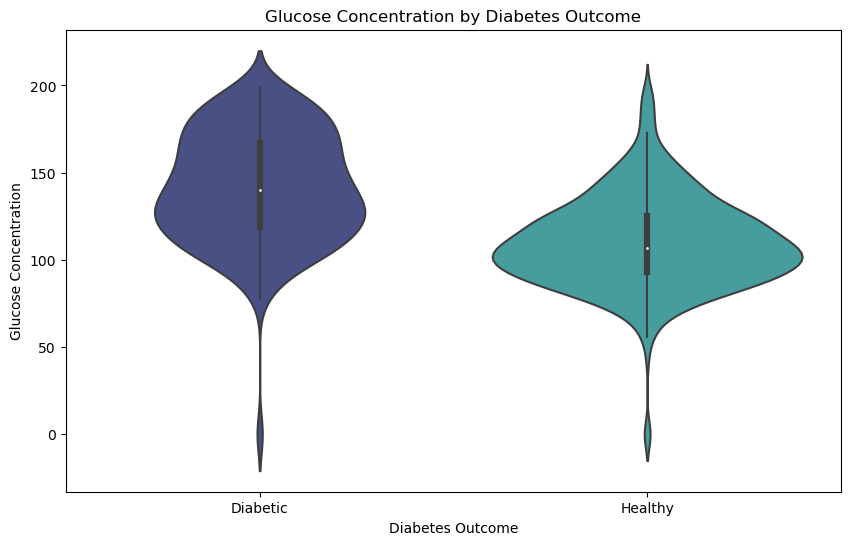

In [25]:
data['Outcome'] = data['Outcome'].map({0: "Healthy", 1: "Diabetic"})
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Outcome', y='Glucose', palette='mako')
plt.title('Glucose Concentration by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Concentration')

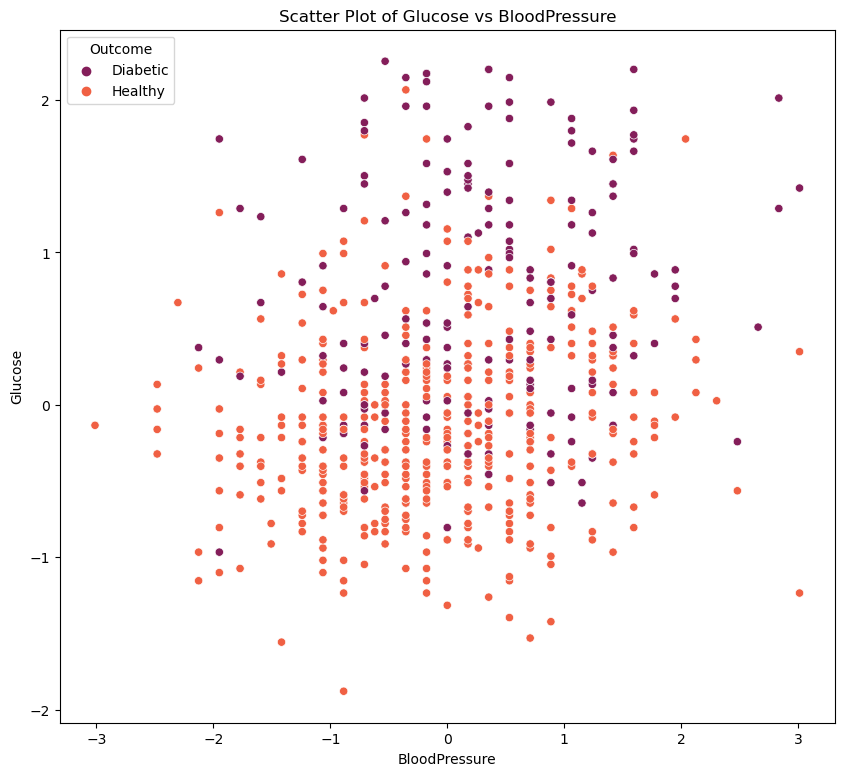

In [26]:
plt.figure(figsize=(10,9))
sns.scatterplot(data=df_clean, x='BloodPressure', y='Glucose', hue='Outcome', palette='rocket')
plt.title('Scatter Plot of Glucose vs BloodPressure')
plt.show()

In [27]:
df_clean['Outcome'] = df_clean['Outcome'].map({"Healthy": 0, "Diabetic": 1})

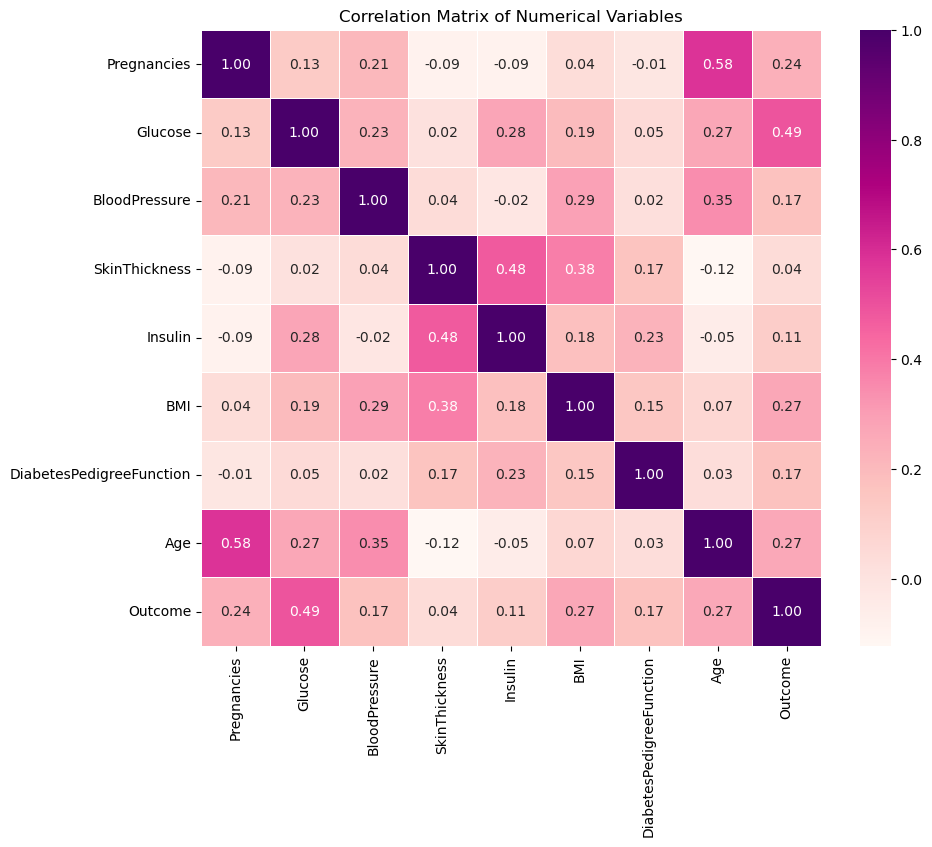

In [28]:
# Compute correlation matrix
correlation_matrix = df_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

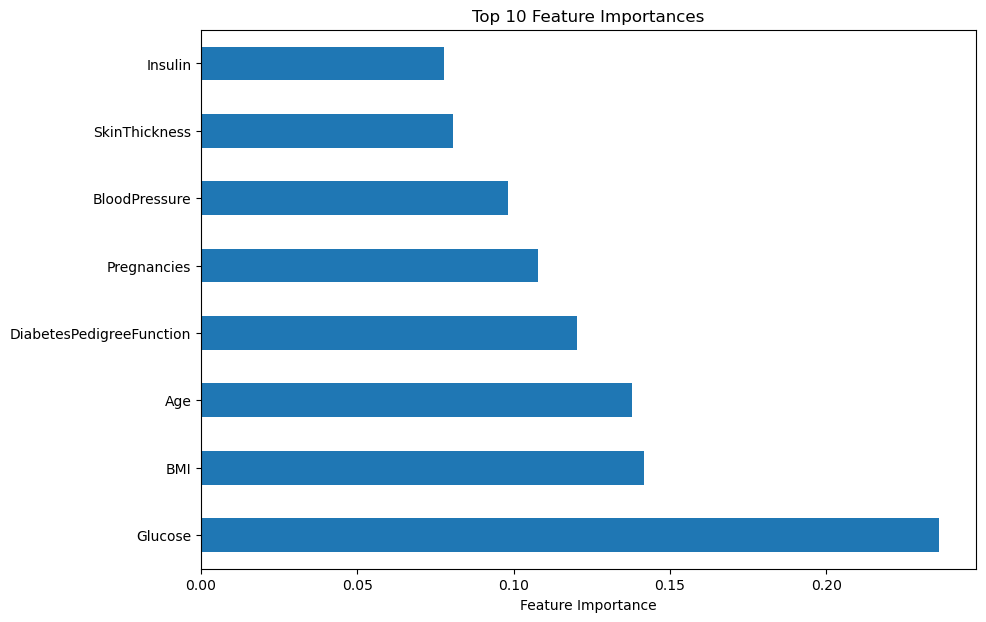

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0,stratify=data['Outcome'])
lab_enc = preprocessing.LabelEncoder()
feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train, lab_enc.fit_transform(y_train))
feat_importances = pd.Series(feature_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 7))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance')
plt.show()

In [30]:
df_new=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

<a id='4'></a>

# 4-Splitting the Data

In [31]:
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0,stratify=df_clean['Outcome'])

<a id='RegressionTask'></a>

# 5-Model Selection (Regression Task)

In [33]:
model = LinearRegression()

<a id='6'></a>

# 6-Model Training

In [34]:
model.fit(X_train, y_train)

LinearRegression()

<a id='7'></a>

# 7-Model Evaluation

In [35]:
# Predict on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.12184766935698156
Root Mean Squared Error (RMSE): 0.34906685513950125
R-squared (R2): 0.43285448444750396


<a id='8'></a>

# 8-Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) after Tuning: {mse}')

Mean Squared Error (MSE) after Tuning: 0.12081295596491318


<a id='ClassificationTask'></a>

# 5-Model Selection (Classification Task ) 

In [37]:
model=LogisticRegression()  

# 6-Model Training

In [38]:
model.fit(X_train, y_train)

D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = model.predict(X_test)

# 7-Model Evaluation

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84375
Confusion Matrix:
 [[41  3]
 [ 7 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        44
           1       0.81      0.65      0.72        20

    accuracy                           0.84        64
   macro avg       0.83      0.79      0.81        64
weighted avg       0.84      0.84      0.84        64



# 8-Hyperparameter Tuning

In [41]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(model, param_grid, cv=15, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warning

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warning

# 9-Model Validation

In [42]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Validation Accuracy:", accuracy_score(y_test, y_pred_best))
print("Validation Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Validation Classification Report:\n", classification_report(y_test, y_pred_best))

Validation Accuracy: 0.84375
Validation Confusion Matrix:
 [[41  3]
 [ 7 13]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        44
           1       0.81      0.65      0.72        20

    accuracy                           0.84        64
   macro avg       0.83      0.79      0.81        64
weighted avg       0.84      0.84      0.84        64



<a id='UnSupervisedTask'></a>

# 5-Model Selection (UnSupervised Task ) 

D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

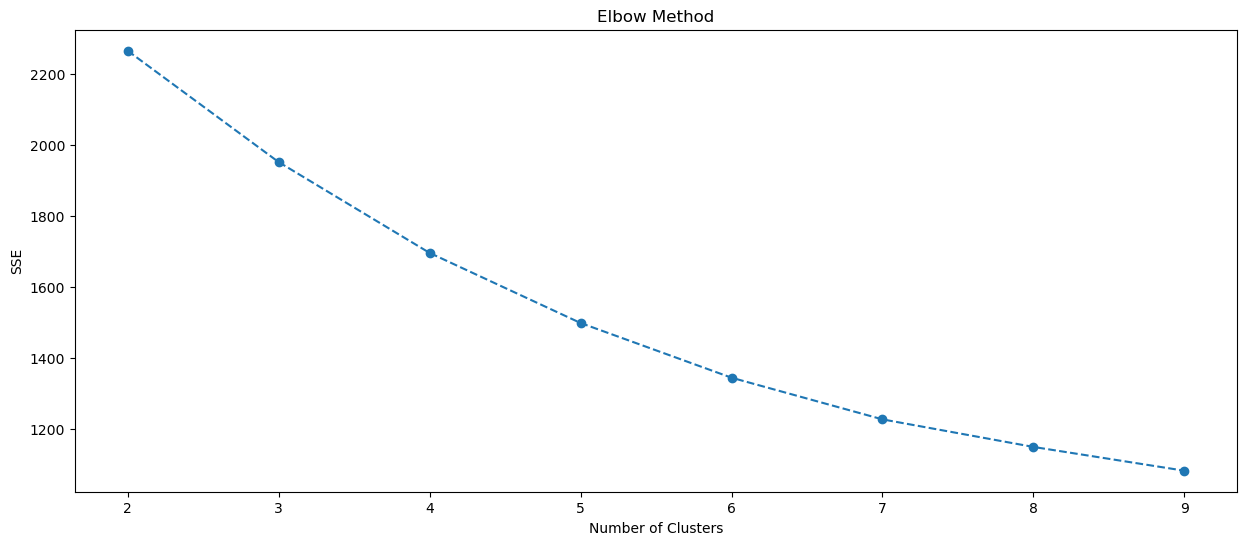

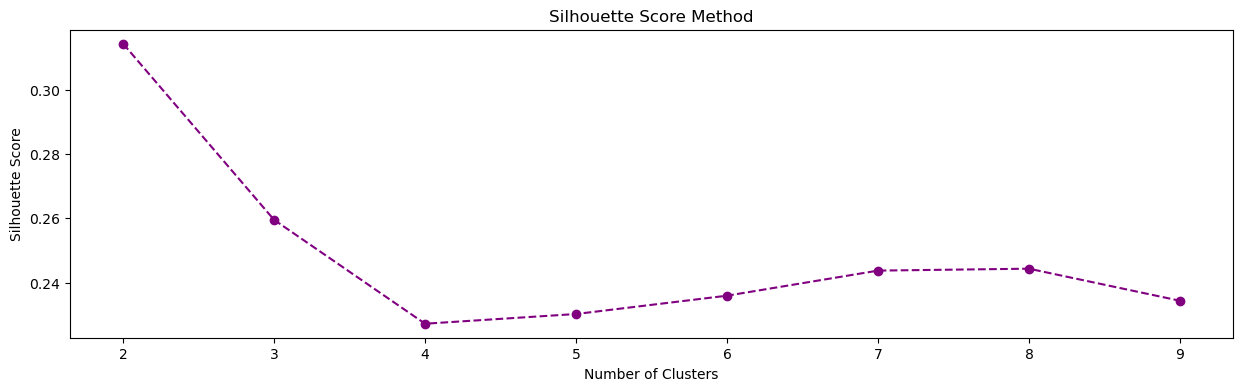

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_new)
sse = []
silhouette_scores = []

for i in range(2, 10):  
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    labels = kmeans.labels_
    silhouette = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette)

# Plot SSE (Elbow Method)
plt.figure(figsize=(15, 6))
plt.plot(range(2, 10), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(15,4))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=42)

# 6-Model Training

In [45]:
clusters = kmeans.fit_predict(X_scaled)

D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


# 7-Model Evaluation

In [46]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score for {3} clusters: {silhouette_avg:.2f}')

Silhouette Score for 3 clusters: 0.26


# 8-Hyperparameter Tuning

D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

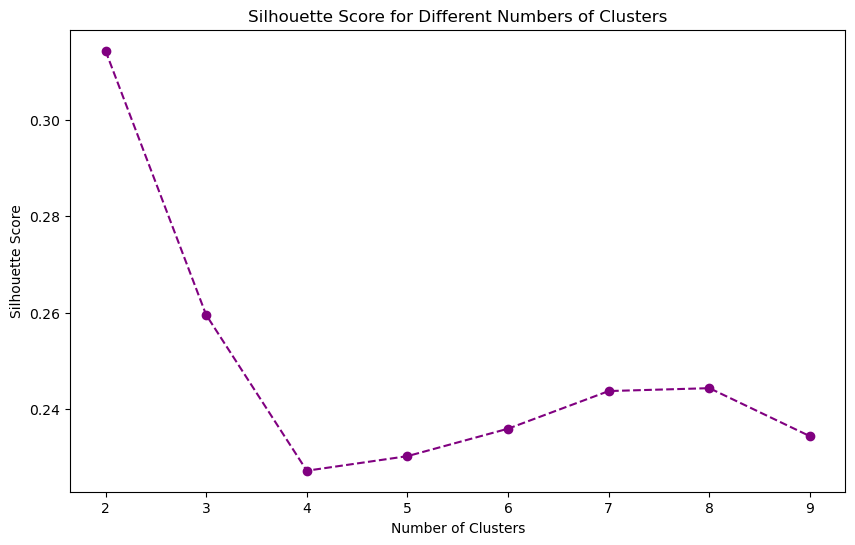

Number of clusters: 2, Silhouette Score: 0.31
Number of clusters: 3, Silhouette Score: 0.26
Number of clusters: 4, Silhouette Score: 0.23
Number of clusters: 5, Silhouette Score: 0.23
Number of clusters: 6, Silhouette Score: 0.24
Number of clusters: 7, Silhouette Score: 0.24
Number of clusters: 8, Silhouette Score: 0.24
Number of clusters: 9, Silhouette Score: 0.23


In [47]:
scores = []
for n_clusters in range(2, 10):  # Testing from 2 to 9 clusters
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), scores, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Output the scores for inspection
for n_clusters, score in zip(range(2, 10), scores):
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.2f}')

# 9-Model Validation

D:\anaconddaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


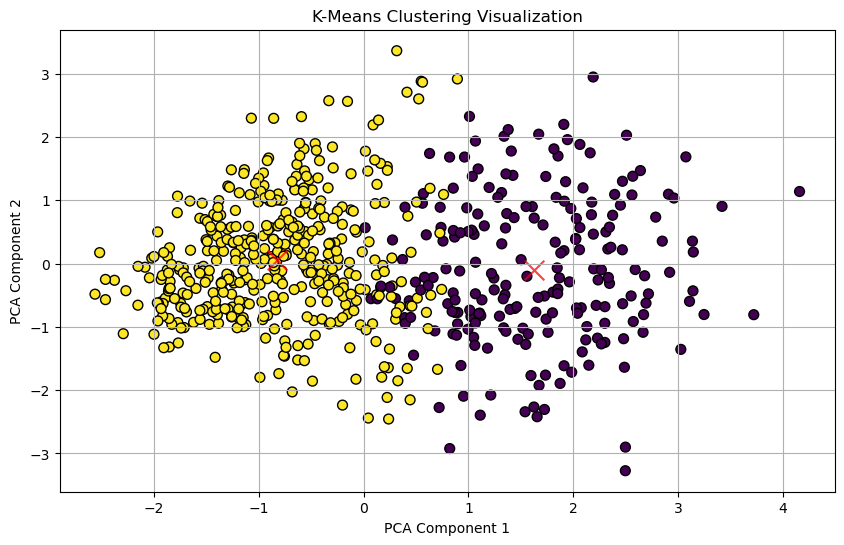

In [48]:
from sklearn.decomposition import PCA
optimal_n_clusters = 2
kmeans = KMeans(n_clusters=optimal_n_clusters, max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
centroids = kmeans.cluster_centers_
centroids_reduced = pca.transform(centroids)

plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization')
plt.grid(True)
plt.show()

### Made with 💖 by : Menna Khaled
### If U like my notebook,UPVOTE🫣